# Residuals

In [1]:
import sys
sys.path.append('..')
import utils
import statsmodels.tsa.stattools as sts

df, df_test = utils.get_index_2018_market_value_splits(market_name='ftse')
df['rw'] = utils.get_random_walk_data()
df.head()

../utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,market_value,wn,rw
date,,,
1994-01-07,3445.98,5688.156286,1122.139662
1994-01-10,3440.58,3683.194726,1080.347860
1994-01-11,3413.77,6332.400094,1082.095245
1994-01-12,3372.02,5721.627642,1083.639265
1994-01-13,3360.01,6277.050528,1067.146255


In [2]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)
sts.adfuller(df.norm)

(-1.9041551418836287,
 0.3301089327703105,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 19541.17381480549)

In [3]:
import numpy as np
models = [None]
llrs = []
model_ar_x_1 = None
for i in np.arange(1, 10):
    (model_ar_x_1, llr_x) = utils.ARMA_LLR_test(df.market_value, model_ar_x_1, (i, 0))
    models.append(model_ar_x_1)
    llrs.append(llr_x)
    print(f'LLR test, Lags: {i}, p-value: {llr_x}')

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


LLR test, Lags: 1, p-value: None
LLR test, Lags: 2, p-value: 0.228
LLR test, Lags: 3, p-value: 0.001
LLR test, Lags: 4, p-value: 0.0
LLR test, Lags: 5, p-value: 0.035
LLR test, Lags: 6, p-value: 0.005
LLR test, Lags: 7, p-value: 0.002
LLR test, Lags: 8, p-value: 0.571
LLR test, Lags: 9, p-value: 0.288


## Analyzing Residuals

In [4]:
df["res_price"] = models[7].fit().resid

In [5]:
df.res_price.mean()

0.35224402888277334

In [6]:
df.res_price.var()

4005.944642020057

In [7]:
sts.adfuller(df.res_price)

(-76.07468139609466,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.414942281)

## ACF and PACF

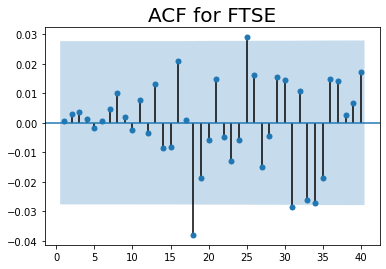

In [11]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt

sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title("ACF for FTSE", size=20)
plt.show()

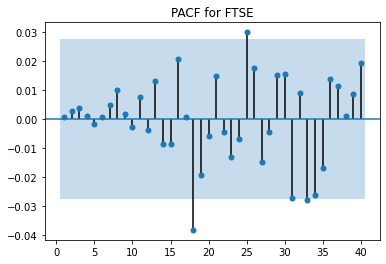

In [13]:
sgt.plot_pacf(df.res_price, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF for FTSE")
plt.show()

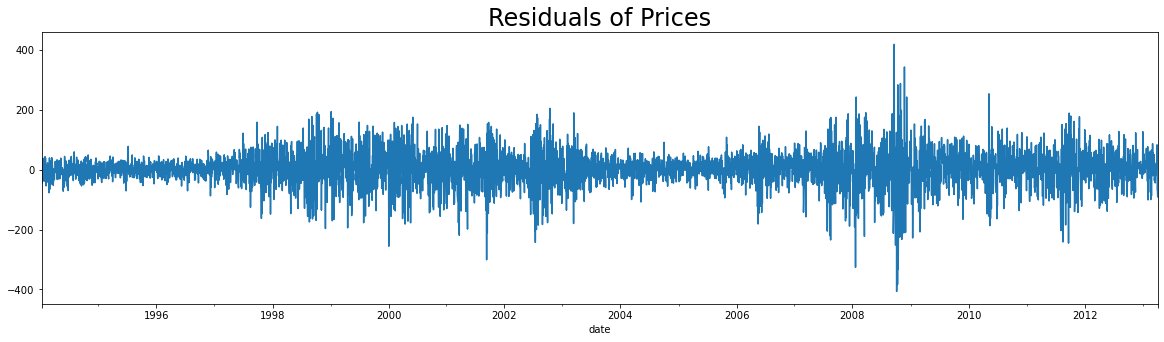

In [14]:
df.res_price[1:].plot(figsize=(20, 5))
plt.title("Residuals of Prices", size=24)
plt.show()